In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import warnings

warnings.filterwarnings('ignore')

/kaggle/input/breast-cancer-dataset/breast-cancer.csv
/kaggle/input/breast-cancer-dataset-svmknnrandomforest/breast-cancer-dataset-svm-knn-randomforest.ipynb


# In this notebook I use
*  Logistic Regression
*  GradientBoosting
*  KNN
*  Support Vector Machine Classifier
*  Gaussian Naive Bayes Classifier
*  Random Forest Classifier

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, classification_report, accuracy_score


In [3]:
# Load data
data = pd.read_csv('/kaggle/input/breast-cancer-dataset/breast-cancer.csv')
data.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [4]:
# Binary classification
data['diagnosis'] = [1 if i == 'M' else 0 for i in data['diagnosis']]

In [5]:
data['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

<AxesSubplot:>

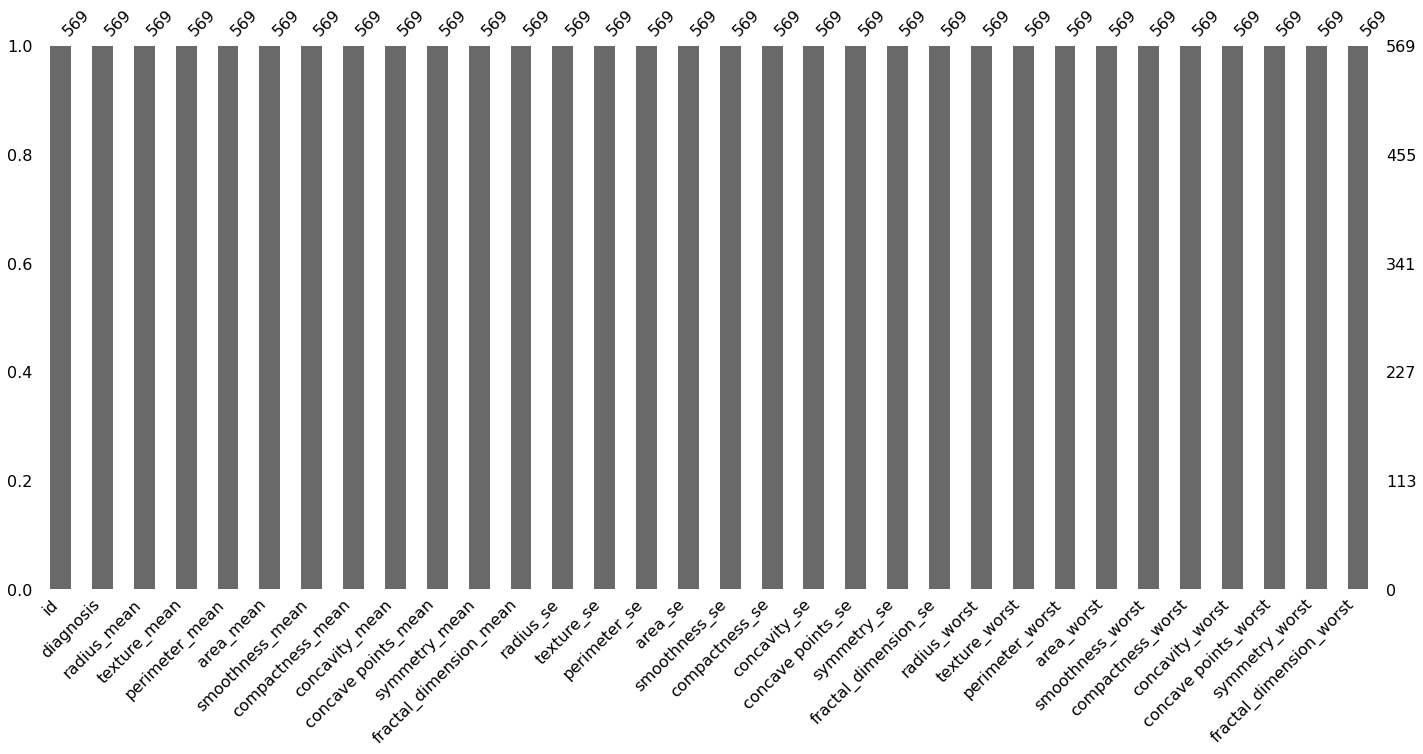

In [6]:
# Missing values
fig = plt.figure(figsize=(15,8))
missingno.bar(data)

<AxesSubplot:xlabel='area_mean', ylabel='Count'>

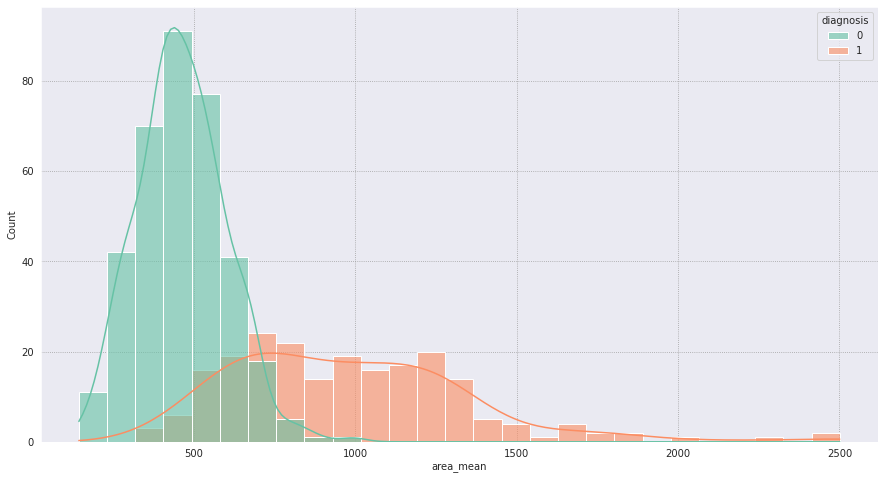

In [7]:
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})

fig = plt.figure(figsize=(15,8))
sns.histplot(data=data,x='area_mean',
             hue='diagnosis',
             kde=True,
             palette='Set2',
             alpha=0.6)

<AxesSubplot:xlabel='radius_mean', ylabel='Count'>

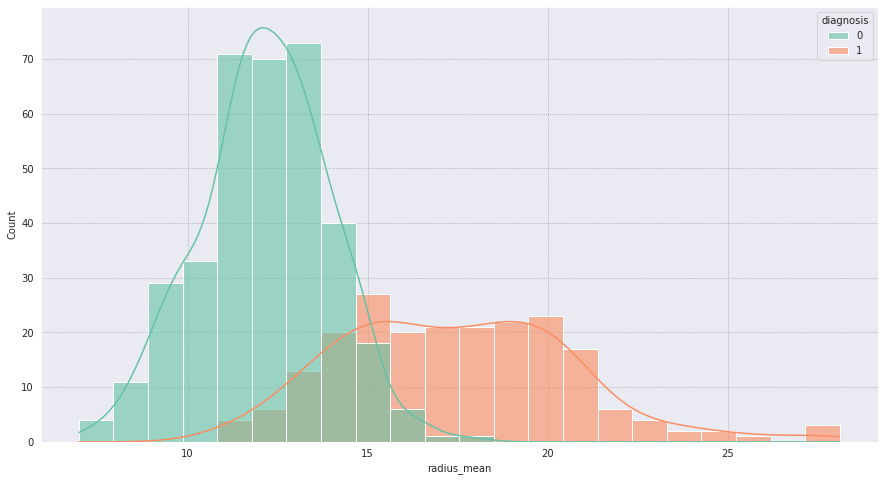

In [8]:
fig = plt.figure(figsize=(15,8))
sns.histplot(data=data,x='radius_mean',
             hue='diagnosis',
             kde=True,
             palette='Set2',
             alpha=0.6)

<AxesSubplot:xlabel='perimeter_mean', ylabel='Count'>

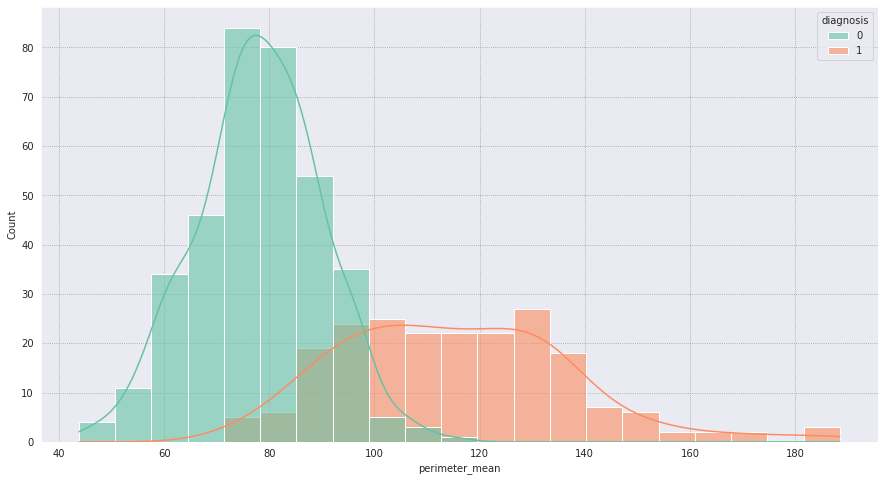

In [9]:
fig = plt.figure(figsize=(15,8))
sns.histplot(data=data,
             x='perimeter_mean',
             hue='diagnosis',
             kde=True,
             palette='Set2',
             alpha=0.6)

<AxesSubplot:xlabel='smoothness_mean', ylabel='Count'>

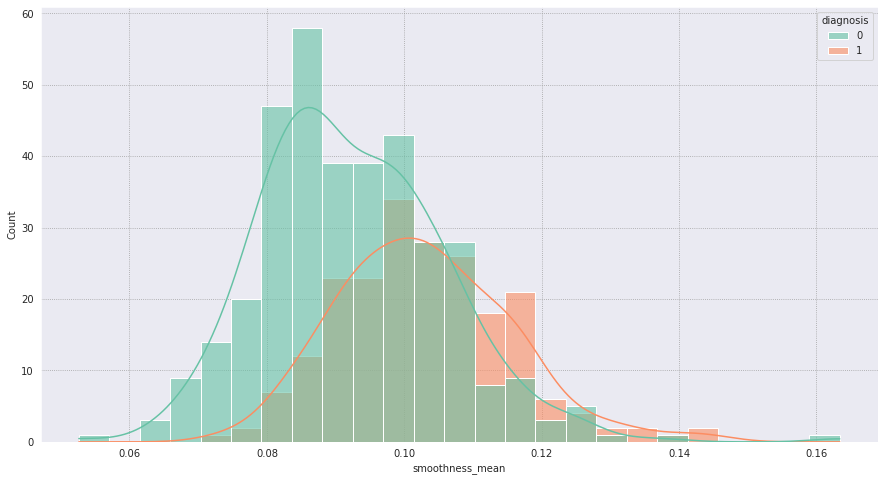

In [10]:
fig = plt.figure(figsize=(15,8))
sns.histplot(data=data,x='smoothness_mean',
             hue='diagnosis',
             kde=True,
             palette='Set2',
             alpha=0.6)

<AxesSubplot:xlabel='texture_mean', ylabel='Count'>

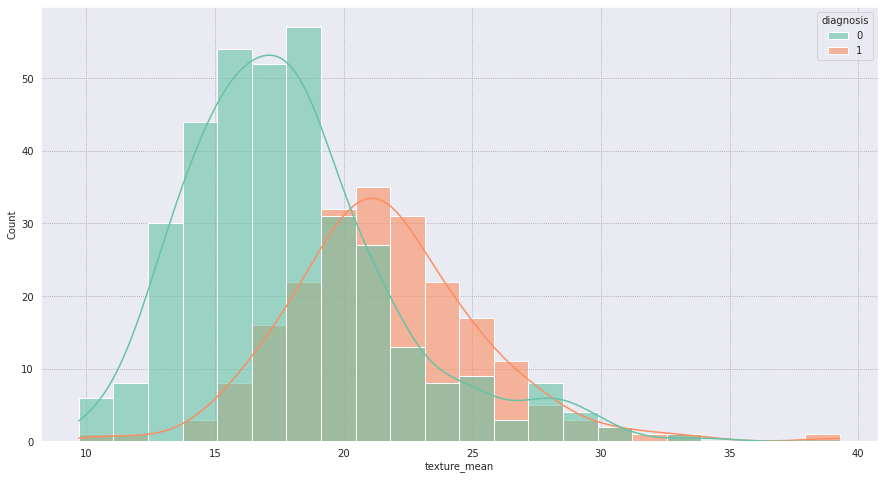

In [11]:
fig = plt.figure(figsize=(15,8))
sns.histplot(data=data,
             x='texture_mean',
             hue='diagnosis',
             kde=True,
             palette='Set2',
             alpha=0.6)

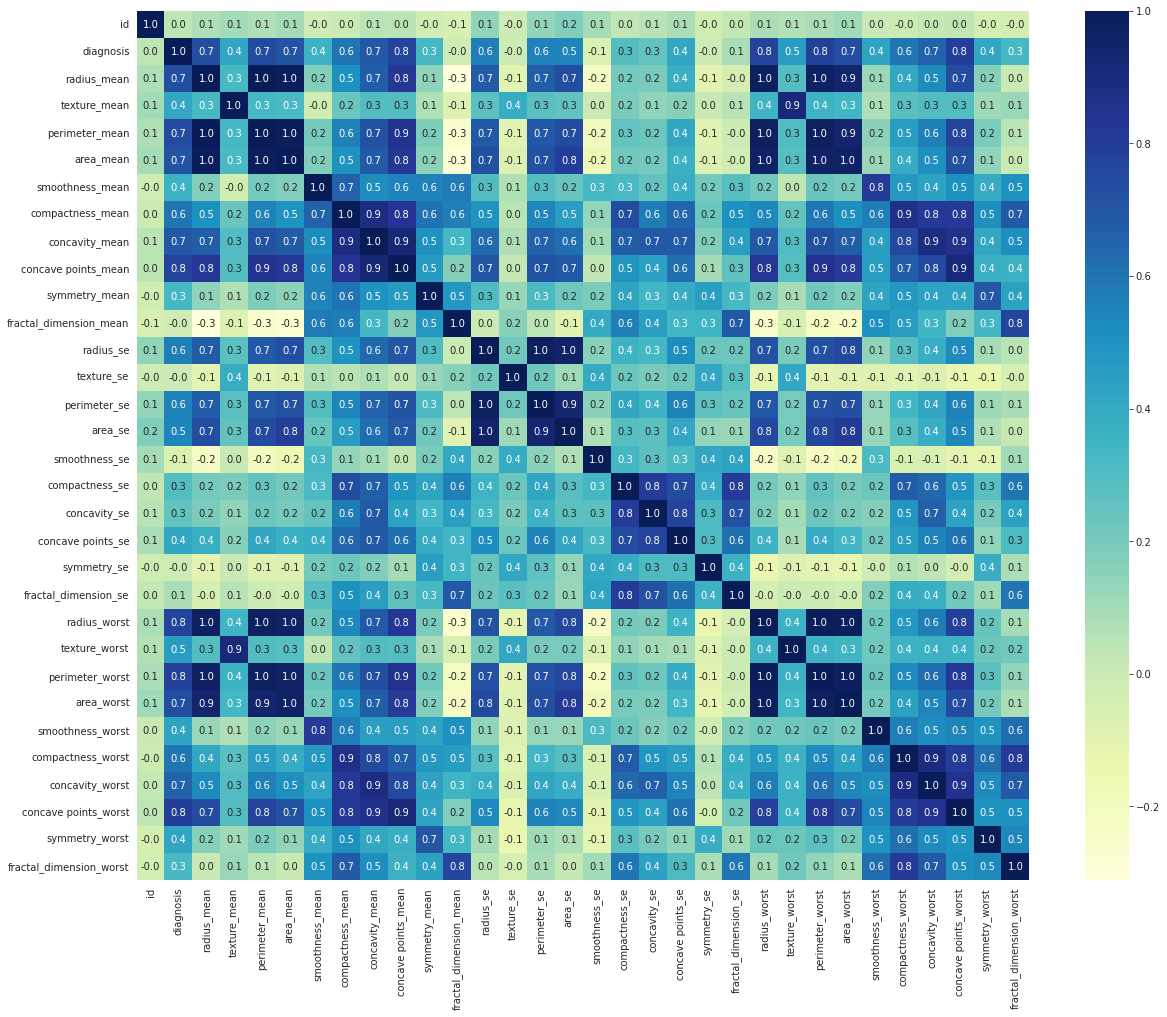

In [12]:
corr = data.corr()
fig = plt.figure(figsize=(20,16))
sns.heatmap(corr,annot=True,
            cmap='YlGnBu',
            fmt=".1f")
plt.show()

# Data Preprocessing

In [13]:
# Get value of correlation 
corr_values = abs(corr["diagnosis"])
# Select highly correlated features 
relevant_features = corr_values[corr_values>0.2]
relevant_features = list(relevant_features.index)
relevant_features.remove('diagnosis')

X = data[relevant_features]
y = data['diagnosis'].values

In [14]:
# Transform features by scaling each feature to a given range
X = StandardScaler().fit_transform(X)
X = pd.DataFrame(X)
X.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.489734,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,0.499255,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,1.228676,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,0.326373,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,1.270543,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [15]:
# Separating data into training and test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)


# Logistic Regression

In [16]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Selection of model parameters using GridSearchCV
lgr = LogisticRegression()
lgr_params = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, .009, 0.01, .09, 1, 5, 10, 25],
    'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga']
}
grid_search_lgr = GridSearchCV(estimator=lgr,
                               param_grid=lgr_params,
                               cv=cv,
                               verbose=1,
                               scoring='roc_auc',
                               error_score=0)
grid_result_lgr = grid_search_lgr.fit(x_train, y_train)
grid_result_lgr.best_params_


Fitting 5 folds for each of 80 candidates, totalling 400 fits


{'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}

In [17]:
# Model training and scoring

lgr = lgr.set_params(**grid_result_lgr.best_params_)
lgr.fit(x_train, y_train)
y_pred_lgr = lgr.predict(x_test)

print(classification_report(y_test, y_pred_lgr))
print(confusion_matrix(y_test, y_pred_lgr))
print(f'ROC-AUC score : {roc_auc_score(y_test, y_pred_lgr)}')
print(f'Accuracy score : {accuracy_score(y_test, y_pred_lgr)}')

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       108
           1       0.98      0.98      0.98        63

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171

[[107   1]
 [  1  62]]
ROC-AUC score : 0.9874338624338624
Accuracy score : 0.9883040935672515


# Gradient Boosting Classifier

In [18]:
# Selection of model parameters using GridSearchCV
gbc = GradientBoostingClassifier(random_state=42)
gbc_params = {
    'n_estimators': range(20, 131, 10),
    'learning_rate': [0.01, 0.1, 0.6, 1],
    'max_features': ['auto', 'log2']
}
grid_search_gbc = GridSearchCV(estimator=gbc,
                               param_grid=gbc_params,
                               cv=cv,
                               verbose=1,
                               scoring='roc_auc',
                               error_score=0)

grid_result_gbc = grid_search_gbc.fit(x_train, y_train)
grid_result_gbc.best_params_

Fitting 5 folds for each of 96 candidates, totalling 480 fits


{'learning_rate': 1, 'max_features': 'log2', 'n_estimators': 50}

In [19]:
# Model training and scoring
gbc = gbc.set_params(**grid_result_gbc.best_params_)
gbc.fit(x_train, y_train)
y_pred_gbc = gbc.predict(x_test)

print(classification_report(y_test, y_pred_gbc))
print(confusion_matrix(y_test, y_pred_gbc))
print(f'ROC-AUC score : {roc_auc_score(y_test, y_pred_gbc)}')
print(f'Accuracy score : {accuracy_score(y_test, y_pred_gbc)}')

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       108
           1       0.95      0.94      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171

[[105   3]
 [  4  59]]
ROC-AUC score : 0.9543650793650793
Accuracy score : 0.9590643274853801


# KNN Classification

In [20]:
# Selection of model parameters using GridSearchCV
knn = KNeighborsClassifier()

knn_params = {
    'n_neighbors': range(1, 15, 2),
    'weights': ['iniform', 'distance'],
    'metric': ['euclidian', 'manhattan', 'minkowski'],
    'leaf_size': [1, 50, 5]
}

grid_search_knn = GridSearchCV(estimator=knn,
                               param_grid=knn_params,
                               cv=cv,
                               verbose=1,
                               scoring='roc_auc')

grid_result_knn = grid_search_knn.fit(x_train, y_train)
grid_result_knn.best_params_

Fitting 5 folds for each of 126 candidates, totalling 630 fits


{'leaf_size': 1,
 'metric': 'minkowski',
 'n_neighbors': 13,
 'weights': 'distance'}

In [21]:
# Model training and scoring
knn = knn.set_params(**grid_result_knn.best_params_)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)

print(classification_report(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))
print(f'ROC-AUC score : {roc_auc_score(y_test, y_pred_knn)}')
print(f'Accuracy score : {accuracy_score(y_test, y_pred_knn)}')

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       108
           1       0.97      0.92      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171

[[106   2]
 [  5  58]]
ROC-AUC score : 0.9510582010582009
Accuracy score : 0.9590643274853801


# Support Vector Machine Classifier

In [22]:
# Selection of model parameters using GridSearchCV
svc = SVC()
svc_params = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'sigmoid']
}
grid_search_svc = GridSearchCV(estimator=svc,
                               param_grid=svc_params,
                               cv=cv,
                               verbose=1,
                               scoring='roc_auc')

grid_result_svc = grid_search_svc.fit(x_train, y_train)
grid_result_svc.best_params_

Fitting 5 folds for each of 48 candidates, totalling 240 fits


{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [23]:
# Model training and scoring
svc = svc.set_params(**grid_result_svc.best_params_)
svc.fit(x_train, y_train)
y_pred_svc = svc.predict(x_test)

print(classification_report(y_test, y_pred_svc))
print(confusion_matrix(y_test, y_pred_svc))
print(f'ROC-AUC score : {roc_auc_score(y_test, y_pred_svc)}')
print(f'Accuracy score : {accuracy_score(y_test, y_pred_svc)}')

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       108
           1       1.00      0.97      0.98        63

    accuracy                           0.99       171
   macro avg       0.99      0.98      0.99       171
weighted avg       0.99      0.99      0.99       171

[[108   0]
 [  2  61]]
ROC-AUC score : 0.9841269841269842
Accuracy score : 0.9883040935672515


# Gaussian Naive Bayes Classifier

In [24]:
# Model training and scoring
nb = GaussianNB()
nb.fit(x_train, y_train)
y_pred_nb = nb.predict(x_test)

print(classification_report(y_test, y_pred_nb))
print(confusion_matrix(y_test, y_pred_nb))
print(f'ROC-AUC score : {roc_auc_score(y_test, y_pred_nb)}')
print(f'Accuracy score : {accuracy_score(y_test, y_pred_nb)}')

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       108
           1       0.92      0.90      0.91        63

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171

[[103   5]
 [  6  57]]
ROC-AUC score : 0.9292328042328042
Accuracy score : 0.935672514619883


# Random Forest Classifier

In [25]:
# Selection of model parameters using GridSearchCV
rfc = RandomForestClassifier(random_state=42)
rfc_params = {
    'min_samples_leaf': range(1, 5),
    'max_features': ['auto', 'log2']
}

grid_search_rfc = GridSearchCV(estimator=rfc,
                               param_grid=rfc_params,
                               cv=cv,
                               verbose=1,
                               scoring='roc_auc')

grid_result_rfc = grid_search_rfc.fit(x_train, y_train)
grid_result_rfc.best_params_

Fitting 5 folds for each of 8 candidates, totalling 40 fits


{'max_features': 'log2', 'min_samples_leaf': 2}

In [26]:
# Model training and scoring
rfc = rfc.set_params(**grid_result_rfc.best_params_)
rfc.fit(x_train, y_train)
y_pred_rfc = rfc.predict(x_test)

print(classification_report(y_test, y_pred_rfc))
print(confusion_matrix(y_test, y_pred_rfc))
print(f'ROC-AUC score : {roc_auc_score(y_test, y_pred_rfc)}')
print(f'Accuracy score : {accuracy_score(y_test, y_pred_rfc)}')

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       108
           1       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171

[[107   1]
 [  4  59]]
ROC-AUC score : 0.9636243386243386
Accuracy score : 0.9707602339181286


# Scores

In [27]:
#Scoring of all algorithms

print('LogisticRegression Accuracy score : %.4f' % accuracy_score(y_test, y_pred_lgr),
      'ROC-AUC score : %.4f' % roc_auc_score(y_test, y_pred_lgr))
print('GradientBoostingClassifier Accuracy score : %.4f' % accuracy_score(y_test, y_pred_gbc),
      'ROC-AUC score : %.4f' % roc_auc_score(y_test, y_pred_gbc))
print('KNN Accuracy score : %.4f' % accuracy_score(y_test, y_pred_knn),
      'ROC-AUC score : %.4f' % roc_auc_score(y_test, y_pred_knn))
print('SVC Accuracy score : %.4f' % accuracy_score(y_test, y_pred_svc),
      'ROC-AUC score : %.4f' % roc_auc_score(y_test, y_pred_svc))
print('Naive Bayes Accuracy score : %.4f' % accuracy_score(y_test, y_pred_nb),
      'ROC-AUC score : %.4f' % roc_auc_score(y_test, y_pred_nb))
print('RandomForestClassifier Accuracy score : %.4f' % accuracy_score(y_test, y_pred_rfc),
      'ROC-AUC score : %.4f' % roc_auc_score(y_test, y_pred_rfc))

LogisticRegression Accuracy score : 0.9883 ROC-AUC score : 0.9874
GradientBoostingClassifier Accuracy score : 0.9591 ROC-AUC score : 0.9544
KNN Accuracy score : 0.9591 ROC-AUC score : 0.9511
SVC Accuracy score : 0.9883 ROC-AUC score : 0.9841
Naive Bayes Accuracy score : 0.9357 ROC-AUC score : 0.9292
RandomForestClassifier Accuracy score : 0.9708 ROC-AUC score : 0.9636
